In [1]:
#-*- coding:utf-8 -*-
import jieba
import sys
import os
import pandas as pd
from string import digits
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

### 建立function --> fileinpath()
### 使用glob模組將路徑./files資料夾內所有的文本txt檔名稱讀進來
### 將這些txt檔名稱儲存到textfile這個list

In [2]:
import os
import glob
def textfile():
    files = glob.glob("./files/*.txt")
    return files
textfile=textfile()
textfile

['./files/1062849.txt',
 './files/1065854.txt',
 './files/1052801.txt',
 './files/1052893營運報告書.txt',
 './files/1055835.txt',
 './files/1065843缺.txt',
 './files/1065875缺.txt',
 './files/1055836.txt',
 './files/1052807.txt',
 './files/1065857營業報告書.txt',
 './files/1055827.txt',
 './files/1065847.txt',
 './files/1065879.txt',
 './files/1052838.txt',
 './files/1055830.txt',
 './files/1065844.txt',
 './files/1055843.txt',
 './files/1065836.txt',
 './files/1062801.txt',
 './files/1052849.txt',
 './files/1055854.txt',
 './files/1065835.txt',
 './files/1062838.txt',
 './files/1065852缺.txt',
 './files/1055879.txt',
 './files/1055850.txt',
 './files/1055844.txt',
 './files/1065830.txt',
 './files/1062807.txt',
 './files/1055841缺.txt',
 './files/1055847.txt',
 './files/1065827.txt',
 './files/1062837.txt',
 './files/1055876.txt',
 './files/1055862.txt',
 './files/1055863.txt',
 './files/1052895.txt',
 './files/1062836.txt',
 './files/1062834.txt',
 './files/1052897.txt',
 './files/1055875.txt',
 '

### 自定義jieba字典，存檔到dict.txt

In [3]:
dictlist = ['大同股份有限公司','公允價值','財務報表','林蔚山','信用評等']
d = open('dict.txt','w+',encoding='utf8')
for i in dictlist:
    d.write(i+'\n')
d.close()
jieba.load_userdict('dict.txt')

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/zz/bqrx4v8s4cq4vszqlfzpp6_40000gn/T/jieba.cache
Loading model cost 0.819 seconds.
Prefix dict has been built succesfully.


### 定義停止詞與要剔除的特殊符號

In [4]:
stopwords = ['致股','我', '對', '\n', '年', '月', '的', '1', '2', '(', ')', '/', '於', '大同', '公司', '4', '106', '臺', '本', '人', '為', '之', '北', '5', '有', '元','一事','TCRI','ai','致股']
e = open('stopwords.txt','w+',encoding='utf8')
for i in stopwords:
    e.write(i+'\n')
e.close()
puncs = '！？｡＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

### 將textfile(list)內的文本讀取進來
### 使用jieba斷詞並加入corpus(list)之中
### 一個文本就是一個string，斷詞用空白隔開

In [5]:
# Take each line in target_txt as an unique document
# Cut each line for trarget_txt, and collect it in corpus.

corpus=[]
corpus_1=[]
jieba.load_userdict('dict.txt')
for t in textfile:
    f = open(t,'r', encoding ="utf-8")
    r = f.read()
    remove_digits = str.maketrans('', '', digits)
    r = r.translate(remove_digits)
    r_list = jieba.cut(r, cut_all=False)
    r_list = list(r_list)
    
    for i in range(40):
        #好像多刪幾次就會成功了= =
        #我重複刪5次
        #如果再出現可以再增加次數
        for w in r_list:
            if (w in stopwords) or (w in puncs) or (w < '\u4e00') or (w > '\u9fff'):
                r_list.remove(w)
    st=" ".join(r_list)
    corpus.append(st)
corpus

['各位 股東 女士 先生 回顧 去年 全球 經濟 擺脫 停滯 陰霾 景氣 逐步 回溫 國內 經濟 受惠 全球 經貿動 能力 道 轉強 出口 明顯 擴張 全 經濟 成長 率 達 創年 新高 本行 也 積極 掌握 景氣 復 甦 所 帶動 交易 消 費及 投資 等 各項 金融 需求 步 出營運 谷底 稅後淨 利達 新 幣 以下 同 億元 重回 成長 軌道 奠定 良好 基礎 獲利 成長 近 年度 營業淨 收益 億元 其中 收益 來源 以 利息 淨 收益 占 最多 其次 為手 續費淨 收益 占 高 本國 銀行 平均值 投資 及其 他淨 收益 占 呆帳 提存 前營業 利益 億元 提 存前 營業 利益 預算達 成率 約 稅前 淨利 億元 扣除 所得 稅費用 億元 後 稅後淨利 億元 成長 達 基本 每股 稅後盈餘 主因 在 信用 風險 控制 得宜 及 爭議 處理 進展 顯著 提存 金額 大 幅 下降 加上 特別 股 一次性 利息 費用 迴 轉所 挹注 資產 總額 億元 較 年底 增加 億元 成長 淨值 規模 億元 較 年底 增加 億元 成長 平均 資產 報酬 率 及 平均 股東 權益 報酬 率 分別 及 均 優 前 一 年度 及 資產品 質 與 資本 結構 方面 逾期 放款 含 催 收款 億元 逾放 比率 降至 放款 之備 抵呆帳 億元 覆蓋率 跳 升至 遠高 前 一 年底 總 放款 覆蓋率 年底 資本 適足率 與 第一 類資本 比率 高達 其中 普通股 權益 比率 從 前年 提高 至 遠高 起適 用法 規之 堅強 資本 結構 足以 支應 本行 未來業務 成長 建構 數位 金融 創新 改造 雙路 並進 因應 數位 金融 發展 趨勢 本行 採取 兩路 並進 策略 一方面 調整 實體 通路 最 適家數 強化 客戶 服務 深度 與 擴大產品 往 來廣度 另一方面 積極 建構 各項 數位 金融 平台 並持續 優化 功能 藉由 線 上線 下 虛實 通路 整合 與 經營 提 供 客戶 即 時 便利 穩定 且 多元 可及 全新 金融 服務 第季 將家 簡易型 分行 整 併 家全 功能型 分行 而 首家 高樓 層 及 無現 金分 行 台北 分行 也 開幕 提 供 客戶 全方位 理 財諮詢 與 交易 等 金融 服務 以持續 優化 分行 經營 效能 另積極 打造 數位化 金融 環境 發展 行動支 

### 訓練tfidf模型
### 將詞頻向量矩陣存到變數tfidf
### 將文字列表存到變數words

In [6]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
words = vectorizer.get_feature_names()
print("len(words): ", len(words))

len(words):  11240


In [7]:
print("tfidf.shape: ", tfidf.shape)
tfidf

tfidf.shape:  (69, 11240)


<69x11240 sparse matrix of type '<class 'numpy.float64'>'
	with 41316 stored elements in Compressed Sparse Row format>

### 將tfidf矩陣中>0.05的詞顯示出來

In [8]:
# check each document
for i in range(len(corpus)):
    print('----Document {0}----'.format(i))
    for j in range(len(words)):
        if tfidf[i,j] > 0.05:
            print(words[j], tfidf[i,j], i ,j)   

----Document 0----
並進 0.054008410691510154 0 410
二度 0.06786458987638738 0 774
人力 0.057301821158288024 0 859
億元 0.2100265073075518 0 1549
優化 0.0658594985859307 0 1565
全球 0.054229123257235286 0 1729
公室 0.06786458987638738 0 1786
其中 0.057301821158288024 0 1831
利益 0.06073413964684681 0 2012
卡數 0.051824721826574216 0 2466
各項 0.05303609981032031 0 2852
同仁 0.05355983052987054 0 2885
基礎 0.0658594985859307 0 3329
增加 0.07209040373014428 0 3395
外幣 0.054455961898971 0 3479
安泰 0.06786458987638738 0 3769
定位 0.051824721826574216 0 3790
客戶 0.12836623794754595 0 3804
客群 0.05355983052987054 0 3819
專業 0.06459597345998026 0 4085
平均 0.05355983052987054 0 4424
年底 0.10610473904044757 0 4454
年度 0.068995768427248 0 4455
強化 0.068995768427248 0 4584
得宜 0.054008410691510154 0 4647
必須 0.059510867170308956 0 4698
成長 0.1807637441907843 0 4930
持續 0.07127534256218077 0 5156
推出 0.052687598868744565 0 5268
提升 0.07549703297362832 0 5326
提存 0.06638225265602936 0 5328
支付 0.07765174679645973 0 5445
收益 0.09009363318006137 0 

隨之 0.05763805398490087 3 10665
隱憂 0.10728482965726349 3 10700
雖外 0.06326959107948095 3 10720
需觀察 0.05763805398490087 3 10814
預估 0.07984654258588238 3 10919
風險並 0.05763805398490087 3 11040
----Document 4----
事業 0.05651830214058226 4 756
企劃 0.0695559197265188 4 1108
企業 0.0543201316461063 4 1111
作業部 0.07995035584989288 4 1210
信用卡 0.1204395529005148 4 1390
億元 0.07298862500393379 4 1549
優化 0.0508911623751062 4 1565
功能 0.054745251318415816 4 2159
合作 0.07735271151421914 4 2856
商品 0.06830370777035598 4 2992
場景 0.060668746138743325 4 3370
增設 0.10830863883732508 4 3424
存款 0.06470437970221772 4 3725
完善 0.0548333887679373 4 3779
完整 0.06168756236392946 4 3781
完整性 0.05826726992180795 4 3782
客戶 0.2873406588946924 4 3804
客群 0.09197094119730603 4 3819
差異化 0.05820408585027206 4 4277
市場 0.11808520228549003 4 4315
平台 0.0626480030070389 4 4423
年度 0.06770111852331892 4 4455
強化 0.09308903796956351 4 4584
往來 0.06952693129494887 4 4637
成長 0.10088024448562599 4 4930
持續 0.103267707474473 4 5156
提供 0.124160300905

防制 0.06178818408095636 9 10578
障礙者 0.05150013507046021 9 10663
項目 0.09311415077748256 9 10900
預算 0.0608011765594508 9 10933
風險 0.054779346846323476 9 11039
體育 0.08085591477150915 9 11119
高齡者 0.05150013507046021 9 11194
----Document 10----
一定 0.051898029620894084 10 13
一般 0.05031390029055204 10 47
主管 0.08798464341483749 10 512
人員 0.12683021190153002 10 864
人才 0.10434807823844218 10 885
以人 0.0662526861438676 10 984
以滿足 0.0662526861438676 10 1039
例如 0.05363324697443853 10 1263
債券 0.05770395233922291 10 1500
債務 0.051898029620894084 10 1509
全數 0.0662526861438676 10 1722
全球 0.050310490249575325 10 1729
六大 0.06293333945998113 10 1805
分行 0.17713323173256051 10 1955
利基 0.09569007527165176 10 1993
功能 0.05678873727116073 10 2159
升息 0.0637933835144345 10 2401
升格 0.05363324697443853 10 2402
升高 0.07547085043582806 10 2413
同仁 0.08944120991866474 10 2885
單位 0.07098592158895091 10 3045
回升 0.05654169168168444 10 3082
土建 0.09937902921580141 10 3246
培養 0.05555144076573339 10 3314
央行 0.05137368125824813 10

鞏固維持 0.05244375286240099 13 10862
鞭策 0.05244375286240099 13 10863
風險 0.06740365450589507 13 11039
香港 0.057008082755742935 13 11090
駐點 0.05244375286240099 13 11091
----Document 14----
互聯網 0.0641895874001869 14 795
企業 0.05984125981132305 14 1111
位化 0.087113255411407 14 1167
億元 0.10405641417994232 14 1549
分行 0.07022972537632231 14 1955
創新 0.05246196450953161 14 2102
化作 0.06411998126474248 14 2277
千元 0.09628438110028036 14 2388
各階段 0.07046124332085069 14 2851
商品 0.10032817910903186 14 2992
因應 0.06019690746541912 14 3113
多元化 0.056132919204706706 14 3524
太平 0.07046124332085069 14 3629
官方 0.05108374786825465 14 3787
客戶 0.1387599439240592 14 3804
專業 0.061097973061681174 14 4085
強化 0.06525951038340895 14 4584
強本 0.0641895874001869 14 4612
必須 0.056288235388254705 14 4698
持續 0.10955041670053603 14 5156
授信 0.05168073557991704 14 5202
提供 0.07693876261455822 14 5320
提昇員工 0.0641895874001869 14 5339
效率 0.05237854664762542 14 5545
效能 0.050659459214274664 14 5554
數位 0.07458229758103879 14 5592
服務 0.1025

卡片 0.06277757731078844 18 2471
境外 0.05101049768381059 18 3389
多元化 0.05748548253451454 18 3524
存款 0.06674151782292273 18 3725
客戶 0.06394655935728616 18 3804
專利 0.09030994151188287 18 4072
市場 0.056841386095365466 18 4315
布局 0.05144034598588 18 4331
帳戶 0.05144034598588 18 4346
技術 0.06694204768886072 18 5060
投資業務 0.0691734494087493 18 5100
推展 0.05103525804210774 18 5287
提升 0.07312936330276247 18 5326
支付 0.08596171764496092 18 5445
政策 0.06874147083655234 18 5520
服務 0.07704170985402475 18 5991
本行 0.15580802353768702 18 6140
業務 0.1634189850241757 18 6238
檔及 0.0525890255867076 18 6458
法令 0.0612423096505293 18 6689
營業 0.062021529840858416 18 7099
營運量 0.07733391657604559 18 7141
環境 0.060221948332250475 18 7379
發展 0.09805308526875876 18 7567
目標 0.0957662669962412 18 7681
相關 0.065966656931646 18 7712
科技 0.05586365574780738 18 7832
積極 0.05504980830484428 18 7902
管理 0.07105173261920683 18 8050
經營 0.09929323565279782 18 8295
證券 0.0856438198777119 18 9337
資訊 0.05274816327023473 18 9630
賣外 0.0525890255

數位 0.06074961881912981 22 5592
未來 0.061641607650671136 22 6116
本行 0.153430294291203 22 6140
業務 0.13562918774269833 22 6238
比率 0.059963043612386684 22 6615
水準 0.05390642084856924 22 6645
活動 0.05119676137119509 22 6741
深耕 0.05552815482652749 22 6839
潮流 0.05121136151317681 22 6940
營業 0.056376961812812904 22 7099
申辦 0.08619539285545998 22 7488
目標 0.0634743933860426 22 7681
積極 0.06254966921503467 22 7902
穩定 0.06879795316391647 22 7928
符合 0.05486642630475178 22 7973
策略 0.05987314362580144 22 8037
經營 0.06074961881912981 22 8295
維持 0.07047120226601614 22 8357
聯邦 0.07785587263720055 22 8624
虛擬 0.09582467958672362 22 8945
規劃 0.06188325617014125 22 9100
貸款 0.10068988152059836 22 9520
資金來源 0.06657490179842285 22 9656
通路 0.12684816407882904 22 10022
金融 0.13369393800853052 22 10385
銀行 0.056512161559457645 22 10421
銀行業 0.052073275843816304 22 10428
電子 0.059963043612386684 22 10778
----Document 23----
----Document 24----
不斷 0.06583737827298869 24 201
中華信 0.05260509659799931 24 476
五個 0.052605096597999

隨時 0.08426036248228357 27 10676
隨身 0.053783114606529805 27 10692
需求 0.06327068343447557 27 10806
預算目 0.0806746719097947 27 10936
風險 0.06922425425337007 27 11039
----Document 28----
一心 0.0782062427984532 28 19
三大 0.05551688251634444 28 76
之評 0.06223856782148528 28 694
以及 0.09925271079592116 28 1002
伙伴 0.0782062427984532 28 1142
信心 0.07585878085062621 28 1384
做好 0.07278475639518134 28 1451
全球 0.0833238853610796 28 1729
兩項 0.0782062427984532 28 1769
前景 0.08887960447181148 28 2067
去年同期 0.11730936419767982 28 2522
台灣 0.1406190203215031 28 2793
品牌 0.05221962641360513 28 2963
地產 0.06223856782148528 28 3272
城市 0.0782062427984532 28 3298
增長 0.1365509278187639 28 3437
外商 0.11944422814648309 28 3472
央行 0.0531779593393925 28 3635
始終 0.06514360047651342 28 3694
定位 0.059722114073241545 28 3790
客戶 0.13736127809211335 28 3804
專注 0.08625366683676827 28 4098
對本 0.0858473987171211 28 4128
就業 0.053720723167592695 28 4171
展望 0.053597351232758675 28 4207
市場 0.06339751296559078 28 4315
強勁 0.09575145319535307

金融 0.34217902590197674 32 10385
鏈現 0.05036316013271987 32 10495
閒置 0.05036316013271987 32 10545
集團 0.0880220499560587 32 10706
需市場 0.05036316013271987 32 10801
類別 0.05036316013271987 32 11001
高度 0.07007304681289925 32 11146
----Document 33----
一次 0.06794081062779397 33 27
之經營 0.05032463854626897 33 676
健康 0.08018611527184417 33 1466
充足 0.05524476562612034 33 1629
內部 0.05104130787598453 33 1697
全新 0.05032463854626897 33 1724
共享 0.05722059540342374 33 1813
兼顧個 0.07782291364483654 33 1886
分行 0.06081851851039585 33 1955
前台 0.10236507179576347 33 2061
創新 0.05088355415915161 33 2102
創新產品 0.06482429807378122 33 2119
加強 0.07866980024406633 33 2169
均衡 0.07773852375408884 33 3287
培育 0.05598903446282049 33 3311
增進營 0.085426616315194 33 3436
外部 0.07430580076214045 33 3515
契機 0.051825682502725894 33 3644
如下 0.08635341892884621 33 3664
委員會 0.06794081062779397 33 3697
安全 0.07196118244070518 33 3761
完備 0.051825682502725894 33 3777
定價 0.06824338119717564 33 3791
客戶 0.09463015355820466 33 3804
客戶關 0.063

市場 0.0520840927146841 37 4315
平均 0.050707274659149405 37 4424
年度 0.11197903925965635 37 4455
年月日 0.09121955486742535 37 4464
強化 0.07465269283977091 37 4584
影響 0.09468602625713439 37 4632
從業 0.08969424405559555 37 4650
成為 0.05242798467062632 37 4923
手續費 0.07864197700593947 37 5016
打擊 0.05332557830943063 37 5021
投資 0.05096303416985224 37 5080
拓展 0.06115564100382269 37 5140
持續 0.0674792719836897 37 5156
授信 0.07242132095360052 37 5202
控制 0.058250986724855666 37 5255
提升 0.08041063316865427 37 5326
提高 0.07693963872866261 37 5345
擴大經營 0.05113196378228283 37 5422
收入 0.10141454931829881 37 5459
收益 0.08529531474439994 37 5472
改造 0.07669794567342424 37 5494
放款 0.09468602625713439 37 5510
政策 0.06532110623479954 37 5520
效能 0.050707274659149405 37 5554
新台幣 0.12464324198936186 37 5642
更名 0.0808007552106617 37 5865
服務 0.05989774159190505 37 5991
本國 0.08719547814190172 37 6131
本行 0.16316319802644114 37 6140
業務 0.0954875033102542 37 6238
機關 0.08137495456568782 37 6453
檢查 0.05979616270373036 37 6464
權益 0

爆冷 0.051969276502352224 40 7152
王開源 0.051969276502352224 40 7296
申請 0.05140088529951628 40 7485
百家 0.051969276502352224 40 7633
盡享 0.051969276502352224 40 7665
社會 0.17792735709013896 40 7792
築建獎 0.051969276502352224 40 8076
級版 0.051969276502352224 40 8155
紛亂 0.051969276502352224 40 8156
給魚 0.051969276502352224 40 8220
線上 0.057964875126949165 40 8394
總承作 0.051969276502352224 40 8431
而星展 0.051969276502352224 40 8593
而是 0.051969276502352224 40 8594
股份 0.06504162404273646 40 8652
自己自足 0.051969276502352224 40 8739
致力 0.054244714897123354 40 8771
舉例 0.051969276502352224 40 8797
艱辛 0.051969276502352224 40 8818
花費 0.051969276502352224 40 8824
萬元 0.07230772524172749 40 8864
萬協助 0.051969276502352224 40 8865
行家 0.0630563011876719 40 9005
行銷獎 0.051969276502352224 40 9047
認知度 0.051969276502352224 40 9270
贈品 0.051969276502352224 40 9725
足見 0.051969276502352224 40 9784
追逐 0.051969276502352224 40 9963
透過 0.05090301594006852 40 9980
通獎 0.051969276502352224 40 10002
運品質 0.051969276502352224 40 10106
金融 

體質 0.050020101087467586 44 11125
----Document 45----
上年 0.05306359131751061 45 115
以合 0.069486892263154 45 1005
企業 0.07403395992253507 45 1111
億元 0.05120171166712772 45 1549
內控 0.056581414263280616 45 1682
內稽 0.07399081255203266 45 1689
公益 0.05867162065756281 45 1798
分行 0.05430392728063722 45 1955
創新業務 0.06466985684334531 45 2116
加計 0.08294922186653277 45 2187
商品 0.06516471273676466 45 2992
因素 0.06225929584615968 45 3126
報告 0.0567011344863939 45 3344
外匯業務量 0.06093347389385646 45 3471
存款 0.07716349620216945 45 3725
宣導 0.051091396631293286 45 3825
年度 0.15138238205721752 45 4455
強化 0.05046079401907251 45 4584
成長 0.12030518487411948 45 4930
提升 0.05797634163097912 45 5326
放款 0.05120171166712772 45 5510
政策 0.11101374684195953 45 5520
文化 0.05307109006567924 45 5614
朋友 0.069486892263154 45 5990
本期 0.07159695894096317 45 6136
本行 0.1568549653633221 45 6140
業務 0.08449382035673714 45 6238
法令 0.06743386928413753 45 6689
洗錢 0.06855022222267972 45 6732
淨利 0.07732928184040268 45 6823
營業 0.093657419182

債務資 0.07117880168650781 48 1511
優質獎 0.056861459650094655 48 1595
全市 0.07117880168650781 48 1719
全球 0.051814857530587816 48 1729
共同 0.06102185011283823 48 1818
加權 0.06484327690744335 48 2177
匯豐 0.06034815054006018 48 2348
升起 0.07117880168650781 48 2411
協議 0.06484327690744335 48 2437
原物 0.056861459650094655 48 2515
及美國 0.06484327690744335 48 2632
台灣 0.16958791378254567 48 2793
台灣將 0.06484327690744335 48 2799
台灣民間 0.07117880168650781 48 2802
各項 0.08107991545765983 48 2852
同事 0.06484327690744335 48 2884
嚴峻 0.06034815054006018 48 3067
國際產業 0.06484327690744335 48 3209
在經 0.07117880168650781 48 3252
地化供 0.06484327690744335 48 3259
地區 0.05571239420143448 48 3261
堅守 0.06034815054006018 48 3334
場業務 0.06484327690744335 48 3372
場經濟 0.07117880168650781 48 3379
場表現 0.07117880168650781 48 3380
外商 0.24758749696806268 48 3472
大中華 0.056861459650094655 48 3559
大調查 0.06484327690744335 48 3602
太平洋 0.07117880168650781 48 3630
客戶 0.0876081486884476 48 3804
審慎管 0.07117880168650781 48 3921
將是 0.051603971027886

銀行 0.08575697359474801 52 10421
防制 0.14972885329466037 52 10578
電子 0.05352568998192695 52 10778
餐券 0.06147774837478474 52 11059
----Document 53----
不確 0.06023797876549733 53 210
主要 0.051806576155737506 53 536
人民 0.053666074751372396 53 893
億元 0.17608742120512763 53 1549
全球 0.06819900919409963 53 1729
創意 0.06058601107797833 53 2099
創新 0.05580314335727172 53 2102
創造 0.05497215979876984 53 2135
加上 0.052232262007862684 53 2161
可望 0.054996726790080816 53 2757
台外幣 0.08534708862946687 53 2785
問題 0.053666074751372396 53 3029
回溫 0.06261216649777157 53 3087
國內 0.06571928292269541 53 3147
國際 0.0503106917728936 53 3198
失業率 0.06517521339164614 53 3638
存款 0.05415763244658691 53 3725
定性 0.05404744526491131 53 3795
客戶 0.09224827352817702 53 3804
宣導 0.06275287056989921 53 3825
展望 0.05849121147215365 53 4207
平均 0.10103595140422197 53 4424
年度 0.08676966844925069 53 4455
必須 0.07484137551044112 53 4698
情勢 0.0962258466391582 53 4769
情形 0.06848428340994724 53 4771
成長 0.14776451992054918 53 4930
我國 0.07463486

年度 0.05870542895655521 56 4455
強化 0.14089302949573249 56 4584
情形 0.06486781646976728 56 4771
成率 0.05552997818498416 56 4927
成長 0.11842894580340758 56 4930
我國 0.10604040499820919 56 4934
持續 0.07429014600147686 56 5156
推動 0.06317648001794135 56 5269
推展 0.06276134649850013 56 5287
提升 0.06744891892688011 56 5326
政策 0.08218760053917729 56 5520
整合 0.0998368791604328 56 5571
數位 0.10566977212179937 56 5592
新台幣 0.07841362136234127 56 5642
智慧 0.10733403762776592 56 5833
最近 0.07234636735220941 56 5917
服務 0.08613014240247825 56 5991
本行 0.21669858487145668 56 6140
核心 0.10465161010552661 56 6197
業務 0.10922111941105453 56 6238
櫃員機 0.06433469450159318 56 6479
法令 0.0941420197477502 56 6689
洗錢 0.0957005202683546 56 6732
淨利 0.053978326139228296 56 6823
營收 0.1010063482038439 56 7098
營業 0.10895981870577016 56 7099
獲利 0.05365966423530559 56 7231
環境 0.1157168933024907 56 7379
發展 0.09689641020278802 56 7567
發展面 0.08084014325308808 56 7577
穩健 0.07469859367823795 56 7917
競爭 0.10571266519844581 56 7966
策略 0.0925

監控法 0.07658056676614351 60 7672
目標 0.09297041124493569 60 7681
相關 0.06861513023641305 60 7712
社區 0.0509983493706456 60 7790
稅前 0.06258907618081276 60 7860
稅後 0.05848893257069505 60 7867
競爭 0.08762470665313787 60 7966
累計 0.07890604279245682 60 8165
經營 0.1557140494106972 60 8295
美金 0.05436285104691348 60 8538
行銷 0.08774352030579988 60 9044
要點 0.09141721865028671 60 9091
規變動 0.06715395974466243 60 9118
計畫 0.06258907618081276 60 9181
資恐 0.0657969018119581 60 9580
資訊系統 0.0509983493706456 60 9640
達成 0.0884064875950664 60 10152
遵循 0.11329985739924442 60 10216
避免 0.05436285104691348 60 10250
金融 0.20397957176363835 60 10385
銀行 0.12415933308497716 60 10421
防制 0.05849568020386659 60 10578
項目 0.05509523854914698 60 10900
預算 0.08634190095424667 60 10933
風險 0.07562963702097698 60 11039
餘額 0.054043622265613274 60 11066
----Document 61----
不良 0.0528498962563268 61 215
主要 0.07316733976500062 61 536
今年 0.11068437072945345 61 912
仟元 0.1678716280249096 61 960
以及 0.057365833473178626 61 1002
企業 0.064212441

將明顯 0.055725556080162844 64 3998
將風險 0.055725556080162844 64 4067
幣服務 0.055725556080162844 64 4405
幣銀行 0.055725556080162844 64 4417
年次 0.055725556080162844 64 4468
度榮 0.055725556080162844 64 4499
成員評 0.055725556080162844 64 4908
成就 0.08457247198787131 64 4910
成長 0.216349937954724 64 4930
承銷商 0.05076550290410692 64 5052
投資者 0.055725556080162844 64 5110
投資者獎 0.055725556080162844 64 5111
持續 0.06664610764653266 64 5156
政府 0.0663847983956607 64 5516
政策 0.058984766810234505 64 5520
效率 0.062136789695547694 64 5545
效轉 0.05076550290410692 64 5557
新興 0.07755394739595871 64 5679
明年 0.055725556080162844 64 5762
普爾國際評 0.055725556080162844 64 5816
最佳 0.09097037904980013 64 5898
服務 0.06760935561085125 64 5991
服務部榮 0.055725556080162844 64 6049
期發 0.055725556080162844 64 6096
本行 0.1002702570627189 64 6140
東協國家 0.05076550290410692 64 6157
榮獲 0.07448498059434987 64 6392
標竿績 0.055725556080162844 64 6419
機會 0.05169666756046058 64 6438
此榮耀 0.055725556080162844 64 6567
此獎 0.11145111216032569 64 6571
測機構 0.05

方面 0.050228832520876975 67 5713
最佳 0.06107631253140711 67 5898
服務 0.10591473559953712 67 5991
期外幣 0.1136109633916456 67 6080
期為 0.06235567215557216 67 6093
期評 0.06455812943177619 67 6104
本行 0.24042902841934172 67 6140
業樹立 0.0568054816958228 67 6331
每年 0.07565851035127492 67 6607
民國 0.17859585346905496 67 6625
治理 0.052462114867436654 67 6686
浪潮 0.07804061280497691 67 6771
營運 0.08494794828202983 67 7111
營運資本 0.0568054816958228 67 7138
獲多 0.06235567215557216 67 7258
產業 0.07194600804793924 67 7435
發展 0.060522706056878366 67 7567
發數位 0.06235567215557216 67 7596
科技 0.06896304398418424 67 7832
稅後資產 0.0528675588954795 67 7876
穩健表現 0.06235567215557216 67 7923
第一本 0.06235567215557216 67 7982
簡便 0.06235567215557216 67 8079
累計募 0.06235567215557216 67 8166
經緯 0.06235567215557216 67 8321
繼於民國 0.06235567215557216 67 8479
義工日 0.0568054816958228 67 8562
聲紋 0.0568054816958228 67 8629
能永續 0.06235567215557216 67 8690
脫離 0.0528675588954795 67 8704
自然人 0.0528675588954795 67 8748
花旗 0.284027408479114 67 8823

### 將tfidf矩陣用pandas套件將結果整理為DataFrame格式

In [9]:
df_tfidf = pd.DataFrame(words,columns=['words'])
for i in range(tfidf.shape[0]):
    docnumber=textfile[i]
    df_tfidf[docnumber] = pd.DataFrame(tfidf.toarray()[i].T)

df_tfidf

,words,./files/1062849.txt,./files/1065854.txt,./files/1052801.txt,./files/1052893營運報告書.txt,./files/1055835.txt,./files/1065843缺.txt,./files/1065875缺.txt,./files/1055836.txt,./files/1052807.txt,...,./files/1052837.txt,./files/1052836.txt,./files/1062895.txt,./files/1065863.txt,./files/1055857營業報告書.txt,./files/1065872.txt,./files/1065858.txt,./files/1062845.txt,./files/1065870.txt,./files/1055838.txt
0,一人,0.000000,0.000000,0.014891,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,一代,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,一個,0.025912,0.015756,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.048917,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,一個案,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,一兆元,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
5,一創,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
6,一卡,0.000000,0.000000,0.014891,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
7,一卡通,0.000000,0.000000,0.000000,0.000000,0.013557,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
8,一反,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
9,一同,0.000000,0.000000,0.000000,0.057638,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [10]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff') or (w in stopwords) or (w in puncs) :
        return 0
    else:
        return 1
df_tfidf=df_tfidf[df_tfidf['words'].apply(chinese) !=0]
df_tfidf

,words,./files/1062849.txt,./files/1065854.txt,./files/1052801.txt,./files/1052893營運報告書.txt,./files/1055835.txt,./files/1065843缺.txt,./files/1065875缺.txt,./files/1055836.txt,./files/1052807.txt,...,./files/1052837.txt,./files/1052836.txt,./files/1062895.txt,./files/1065863.txt,./files/1055857營業報告書.txt,./files/1065872.txt,./files/1065858.txt,./files/1062845.txt,./files/1065870.txt,./files/1055838.txt
0,一人,0.000000,0.000000,0.014891,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,一代,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,一個,0.025912,0.015756,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.048917,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,一個案,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,一兆元,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
5,一創,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
6,一卡,0.000000,0.000000,0.014891,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
7,一卡通,0.000000,0.000000,0.000000,0.000000,0.013557,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
8,一反,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
9,一同,0.000000,0.000000,0.000000,0.057638,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


### 儲存到excel --> tfidf.xlsx
### 將df_tfidf表格存到sheet -->tfidf_1

In [11]:
writer = pd.ExcelWriter('tfidf.xlsx')
df_tfidf.to_excel(writer,'tfidf_1')
writer.save()

In [12]:
tfarray=tfidf.toarray()
tfarray

array([[0.        , 0.        , 0.02591236, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.015756  , ..., 0.        , 0.        ,
        0.        ],
       [0.01489133, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### 使用CountVectorizer()方法
### 統計corpus之中個別文本的文字次數
### 用pandas套件將結果整理為DataFrame格式
### column-->words是所有出現的文字
### 右邊每一個column都是一個文本的文字出現次數統計

In [13]:
vec = CountVectorizer()
X = vec.fit_transform(corpus)
df = pd.DataFrame(vec.get_feature_names(),columns=['words'])
for i in range(X.shape[0]):
    docnumber='doc'+str(i+1)+'_tfdif'
    df[docnumber] = pd.DataFrame(X.toarray()[i].T)
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif,doc6_tfdif,doc7_tfdif,doc8_tfdif,doc9_tfdif,...,doc60_tfdif,doc61_tfdif,doc62_tfdif,doc63_tfdif,doc64_tfdif,doc65_tfdif,doc66_tfdif,doc67_tfdif,doc68_tfdif,doc69_tfdif
0,一人,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,一代,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,一個,1,1,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
3,一個案,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,一兆元,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,一創,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,一卡,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,一卡通,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,一反,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,一同,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df.head()

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif,doc6_tfdif,doc7_tfdif,doc8_tfdif,doc9_tfdif,...,doc60_tfdif,doc61_tfdif,doc62_tfdif,doc63_tfdif,doc64_tfdif,doc65_tfdif,doc66_tfdif,doc67_tfdif,doc68_tfdif,doc69_tfdif
0,一人,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,一代,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,一個,1,1,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
3,一個案,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,一兆元,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 建立chinese(w)方法，判斷輸入的w是不是在漢字區間，是 -->回傳1    不是-->回傳0
 - 使用unicode編碼剔除不是漢字的項目
 - 漢字範圍u4e00- u9fff
 
### 判斷df表格中是漢字的項目才保留下來

 - df['words'].apply(chinese)會將df表格中'words'這個column內的所有項目作為w執行chinese(w)方法，會回傳0或1
 - df['words'].apply(chinese) !=0判斷回傳不等於0的項目(漢字)
 - df[df['words'].apply(chinese) !=0]用df[...]叫出所有符合上述判斷的項目的rows 
 - 將這個結果重新儲存回df表格
 
### 這樣df表格中就只會剩下漢字的項目 

In [15]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff'):
        return 0
    else:
        return 1
df=df[df['words'].apply(chinese) !=0]
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif,doc6_tfdif,doc7_tfdif,doc8_tfdif,doc9_tfdif,...,doc60_tfdif,doc61_tfdif,doc62_tfdif,doc63_tfdif,doc64_tfdif,doc65_tfdif,doc66_tfdif,doc67_tfdif,doc68_tfdif,doc69_tfdif
0,一人,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,一代,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,一個,1,1,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
3,一個案,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,一兆元,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,一創,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,一卡,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,一卡通,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,一反,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,一同,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 儲存到excel --> wordscount.xlsx
### 將df表格存到sheet -->wordscount_1

In [16]:
writer = pd.ExcelWriter('wordscount.xlsx')
df.to_excel(writer,'wordscount_1')
writer.save()

### 全部文字的dict建立文字雲

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

allcount=vec.vocabulary_
remove_list = ['']
font = r"/Users/liangpeiru/Downloads/碩二/資本市場/wqy-microhei.ttc"
wordcloud = WordCloud(font_path = font, background_color="white")
wordcloud.fit_words(allcount)
plt.imshow(wordcloud)

In [18]:
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt
X = tfidf.toarray()
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)
Y_sklearn

array([[-0.06917061,  0.09662882],
       [-0.24423666,  0.0235536 ],
       [-0.25363335, -0.01835953],
       [ 0.06937042, -0.23950667],
       [-0.19868335,  0.30051316],
       [ 0.37720899, -0.17161889],
       [ 0.37720899, -0.17161889],
       [-0.08852723,  0.21021906],
       [ 0.1490976 , -0.0672557 ],
       [-0.18608226, -0.16202403],
       [ 0.04870155, -0.27856813],
       [ 0.2562738 ,  0.11259283],
       [ 0.40679972,  0.05613204],
       [-0.06649025, -0.07927038],
       [-0.1927446 ,  0.12209608],
       [-0.19975204,  0.01294753],
       [-0.13658599, -0.16366979],
       [-0.07593605,  0.25875547],
       [-0.16097264, -0.09301619],
       [-0.01807341,  0.03975835],
       [-0.23574043, -0.0012082 ],
       [-0.18910126,  0.32965911],
       [-0.10122705, -0.03153739],
       [ 0.37720899, -0.17161889],
       [ 0.42431027,  0.09451746],
       [-0.0748221 , -0.02884077],
       [-0.12774626,  0.01153402],
       [-0.18854407,  0.11564742],
       [ 0.28069667,

No handles with labels found to put in legend.


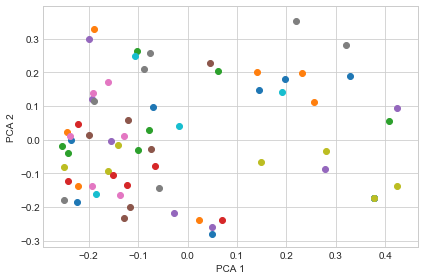

In [19]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    #for lab, col in zip(('low', 'medium', 'high'),
                        #('red', 'green','orange')):
    for i in range(len(Y_sklearn)):

        plt.scatter(Y_sklearn[i][0], Y_sklearn[i][1])
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [20]:
from sklearn.cluster import KMeans

In [21]:
kmeans = KMeans(n_clusters = 2)
X_clustered = kmeans.fit_predict(Y_sklearn)

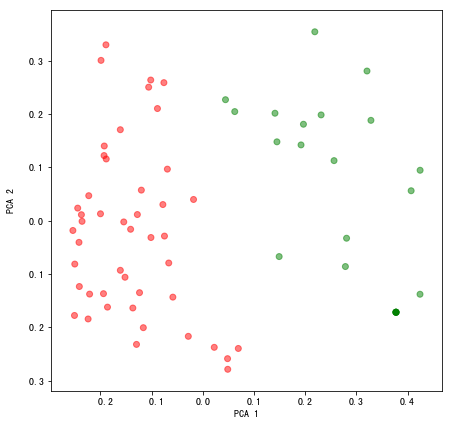

In [22]:
#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b', 3: 'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(Y_sklearn[:,0],Y_sklearn[:,1], c= label_color, alpha=0.5) 
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()